In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

path_ds_cle = 'D:\Facultad\Semestre 10\Ciencia de datos\Arboles de Desición\heart+disease\processed.cleveland.data'
dfcle = pd.read_csv(path_ds_cle,delimiter=',',header=None)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dfcle.columns = column_names

# Mostrar las primeras filas del DataFrame
print(dfcle.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [123]:
path_ds_hun = 'D:\Facultad\Semestre 10\Ciencia de datos\Arboles de Desición\heart+disease\processed.hungarian.data'
dfhun = pd.read_csv(path_ds_hun,delimiter=',',header=None)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dfhun.columns = column_names

# Mostrar las primeras filas del DataFrame
print(dfhun.head())

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  target  
0    ?       0  
1    ?       0  
2    ?       0  
3    6       0  
4    ?       0  


In [89]:
path_ds_swi = 'D:\Facultad\Semestre 10\Ciencia de datos\Arboles de Desición\heart+disease\processed.switzerland.data'
dfswi = pd.read_csv(path_ds_swi,delimiter=',',header=None)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dfswi.columns = column_names

# Mostrar las primeras filas del DataFrame
print(dfswi.head())

   age  sex  cp trestbps  chol fbs restecg thalach exang oldpeak slope ca  \
0   32    1   1       95     0   ?       0     127     0      .7     1  ?   
1   34    1   4      115     0   ?       ?     154     0      .2     1  ?   
2   35    1   4        ?     0   ?       0     130     1       ?     ?  ?   
3   36    1   4      110     0   ?       0     125     1       1     2  ?   
4   38    0   4      105     0   ?       0     166     0     2.8     1  ?   

  thal  target  
0    ?       1  
1    ?       1  
2    7       3  
3    6       1  
4    ?       2  


In [124]:
path_ds_va = 'D:\Facultad\Semestre 10\Ciencia de datos\Arboles de Desición\heart+disease\processed.va.data'
dfva = pd.read_csv(path_ds_va,delimiter=',',header=None)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dfva.columns = column_names

# Mostrar las primeras filas del DataFrame
print(dfva.head())

   age  sex  cp trestbps chol fbs  restecg thalach exang oldpeak slope ca  \
0   63    1   4      140  260   0        1     112     1       3     2  ?   
1   44    1   4      130  209   0        1     127     0       0     ?  ?   
2   60    1   4      132  218   0        1     140     1     1.5     3  ?   
3   55    1   4      142  228   0        1     149     1     2.5     1  ?   
4   66    1   3      110  213   1        2      99     1     1.3     2  ?   

  thal  target  
0    ?       2  
1    ?       0  
2    ?       2  
3    ?       1  
4    ?       0  


Primero tomamos los cuatro dataset y los hicimos dataframe

Formato de tabla 

Edad - age,
Sexo - sex,
Tipo de dolor de pecho - cp,
Presión arterial en reposo - trestbps,
Colesterol sérico - chol,
Azúcar en sangre en ayunas - fbs,
Resultados del ECG - restecg,
Frecuencia cardíaca máxima alcanzada - thalach,
Angina inducida por el ejercicio - Exang,
Depresión del segmento ST - oldpeak,
Pendiente del segmento ST - slope,
Número de vasos principales coloreados por fluoroscopia - ca,
Talasemia - thal,
Presencia de enfermedad cardíaca - target,

In [125]:
df = [dfcle,dfhun,dfswi,dfva]
df_combinado = pd.concat(df,ignore_index=True)
df_ca = df_combinado.sample(frac = 1, random_state=42).reset_index(drop=True)
df_ca.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,36.0,1.0,2.0,120,166,0,0,180,0,0.0,?,?,?,0
1,45.0,1.0,2.0,140,224,1,0,122,0,0.0,?,?,?,0
2,48.0,1.0,4.0,160,329,0,0,92,1,1.5,2,?,?,1
3,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
4,40.0,0.0,4.0,150,392,0,0,130,0,2.0,2,?,6,1


In [126]:


# Contar el número de valores faltantes por columna
Valores_Faltantes = df_ca.apply(lambda x: x.eq('?').sum())

# Calcular el porcentaje de valores faltantes por columna
total_filas = len(df_ca)
Porcentaje = (Valores_Faltantes / total_filas) * 100

# Mostrar el porcentaje de valores faltantes por columna
print("Porcentaje de valores faltantes por columna:")
print(Porcentaje)


Porcentaje de valores faltantes por columna:
age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalach      5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
target       0.000000
dtype: float64


Después revisamos el porcentaje de datos perdidos por columna para saber si eliminarla 

In [195]:

columnas_eliminar = ['slope','ca','thal','sex','exang']
df_clean = df_ca.drop(columns = columnas_eliminar)

columnas_a_llenar = ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak']
df_clean.replace('?', np.nan, inplace=True)

if 'chol' in df_clean.columns:
    # Convierte la columna "trestbps" a tipo numérico, convirtiendo errores a NaN
    df_clean['chol'] = pd.to_numeric(df_clean['chol'], errors='coerce')

    # Calcula la media de la columna "trestbps", omitiendo los NaN
    trestbps_mean = df_clean['chol'].mean()

    # Llena los valores NaN en la columna "trestbps" con su media
    df_clean['chol'].fillna(trestbps_mean, inplace=True)

if 'trestbps' in df_clean.columns:
    # Convierte la columna "trestbps" a tipo numérico, convirtiendo errores a NaN
    df_clean['trestbps'] = pd.to_numeric(df_clean['trestbps'], errors='coerce')

    # Calcula la media de la columna "trestbps", omitiendo los NaN
    trestbps_mean = df_clean['trestbps'].mean()

    # Llena los valores NaN en la columna "trestbps" con su media
    df_clean['trestbps'].fillna(trestbps_mean, inplace=True)

if 'thalach' in df_clean.columns:
    # Convierte la columna "trestbps" a tipo numérico, convirtiendo errores a NaN
    df_clean['thalach'] = pd.to_numeric(df_clean['thalach'], errors='coerce')

    # Calcula la media de la columna "trestbps", omitiendo los NaN
    trestbps_mean = df_clean['thalach'].mean()

    # Llena los valores NaN en la columna "trestbps" con su media
    df_clean['thalach'].fillna(trestbps_mean, inplace=True)


mapeo = {1: 1, 2: 1, 3: 1, 4: 1}
df_clean['target'] = df_clean['target'].replace(mapeo)
df_clean




,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,target
0,36.0,2.0,120.0,166.0,0,0,180.0,0.0,0
1,45.0,2.0,140.0,224.0,1,0,122.0,0.0,0
2,48.0,4.0,160.0,329.0,0,0,92.0,1.5,1
3,59.0,4.0,164.0,176.0,1.0,2.0,90.0,1.0,1
4,40.0,4.0,150.0,392.0,0,0,130.0,2.0,1
...,...,...,...,...,...,...,...,...,...
915,59.0,4.0,140.0,177.0,0.0,0.0,162.0,0.0,1
916,61.0,4.0,140.0,207.0,0.0,2.0,138.0,1.9,1
917,75.0,4.0,160.0,310.0,1,0,112.0,2,0
918,53.0,2.0,140.0,216.0,0,0,142.0,2.0,0


Después de quitar las columnas con un alto porcentaje de signos "?", procedimos a reemplazar los datos de las columnas restantes con NaN en algunos casos ya que no podemos usar la media al ser caracteristicas categóricas, ademas de juntar en 0 y 1 para saber si tiene una enfermedad cardiaca o no

In [196]:
X = df_clean.drop('target',axis = 1)
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Dividimos el dataframe en Train y Test, ademas de separar las etiquetas de de las caracterisitcas 

In [197]:
clf = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 5, 10, 20],  # None significa que no hay límite de profundidad
    'criterion': ['gini', 'entropy']
}

# Utiliza GridSearchCV para buscar los mejores parámetros
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Utiliza el modelo con los mejores parámetros
best_clf = grid_search.best_estimator_

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5}


Se usa GridSearchCV para buscar los mejores parametros que definimos en param_grid (Profundidad Máxima y Criterion de División) y el número de divisiones con cv, GridSearchCV seleciona la mejor combinación

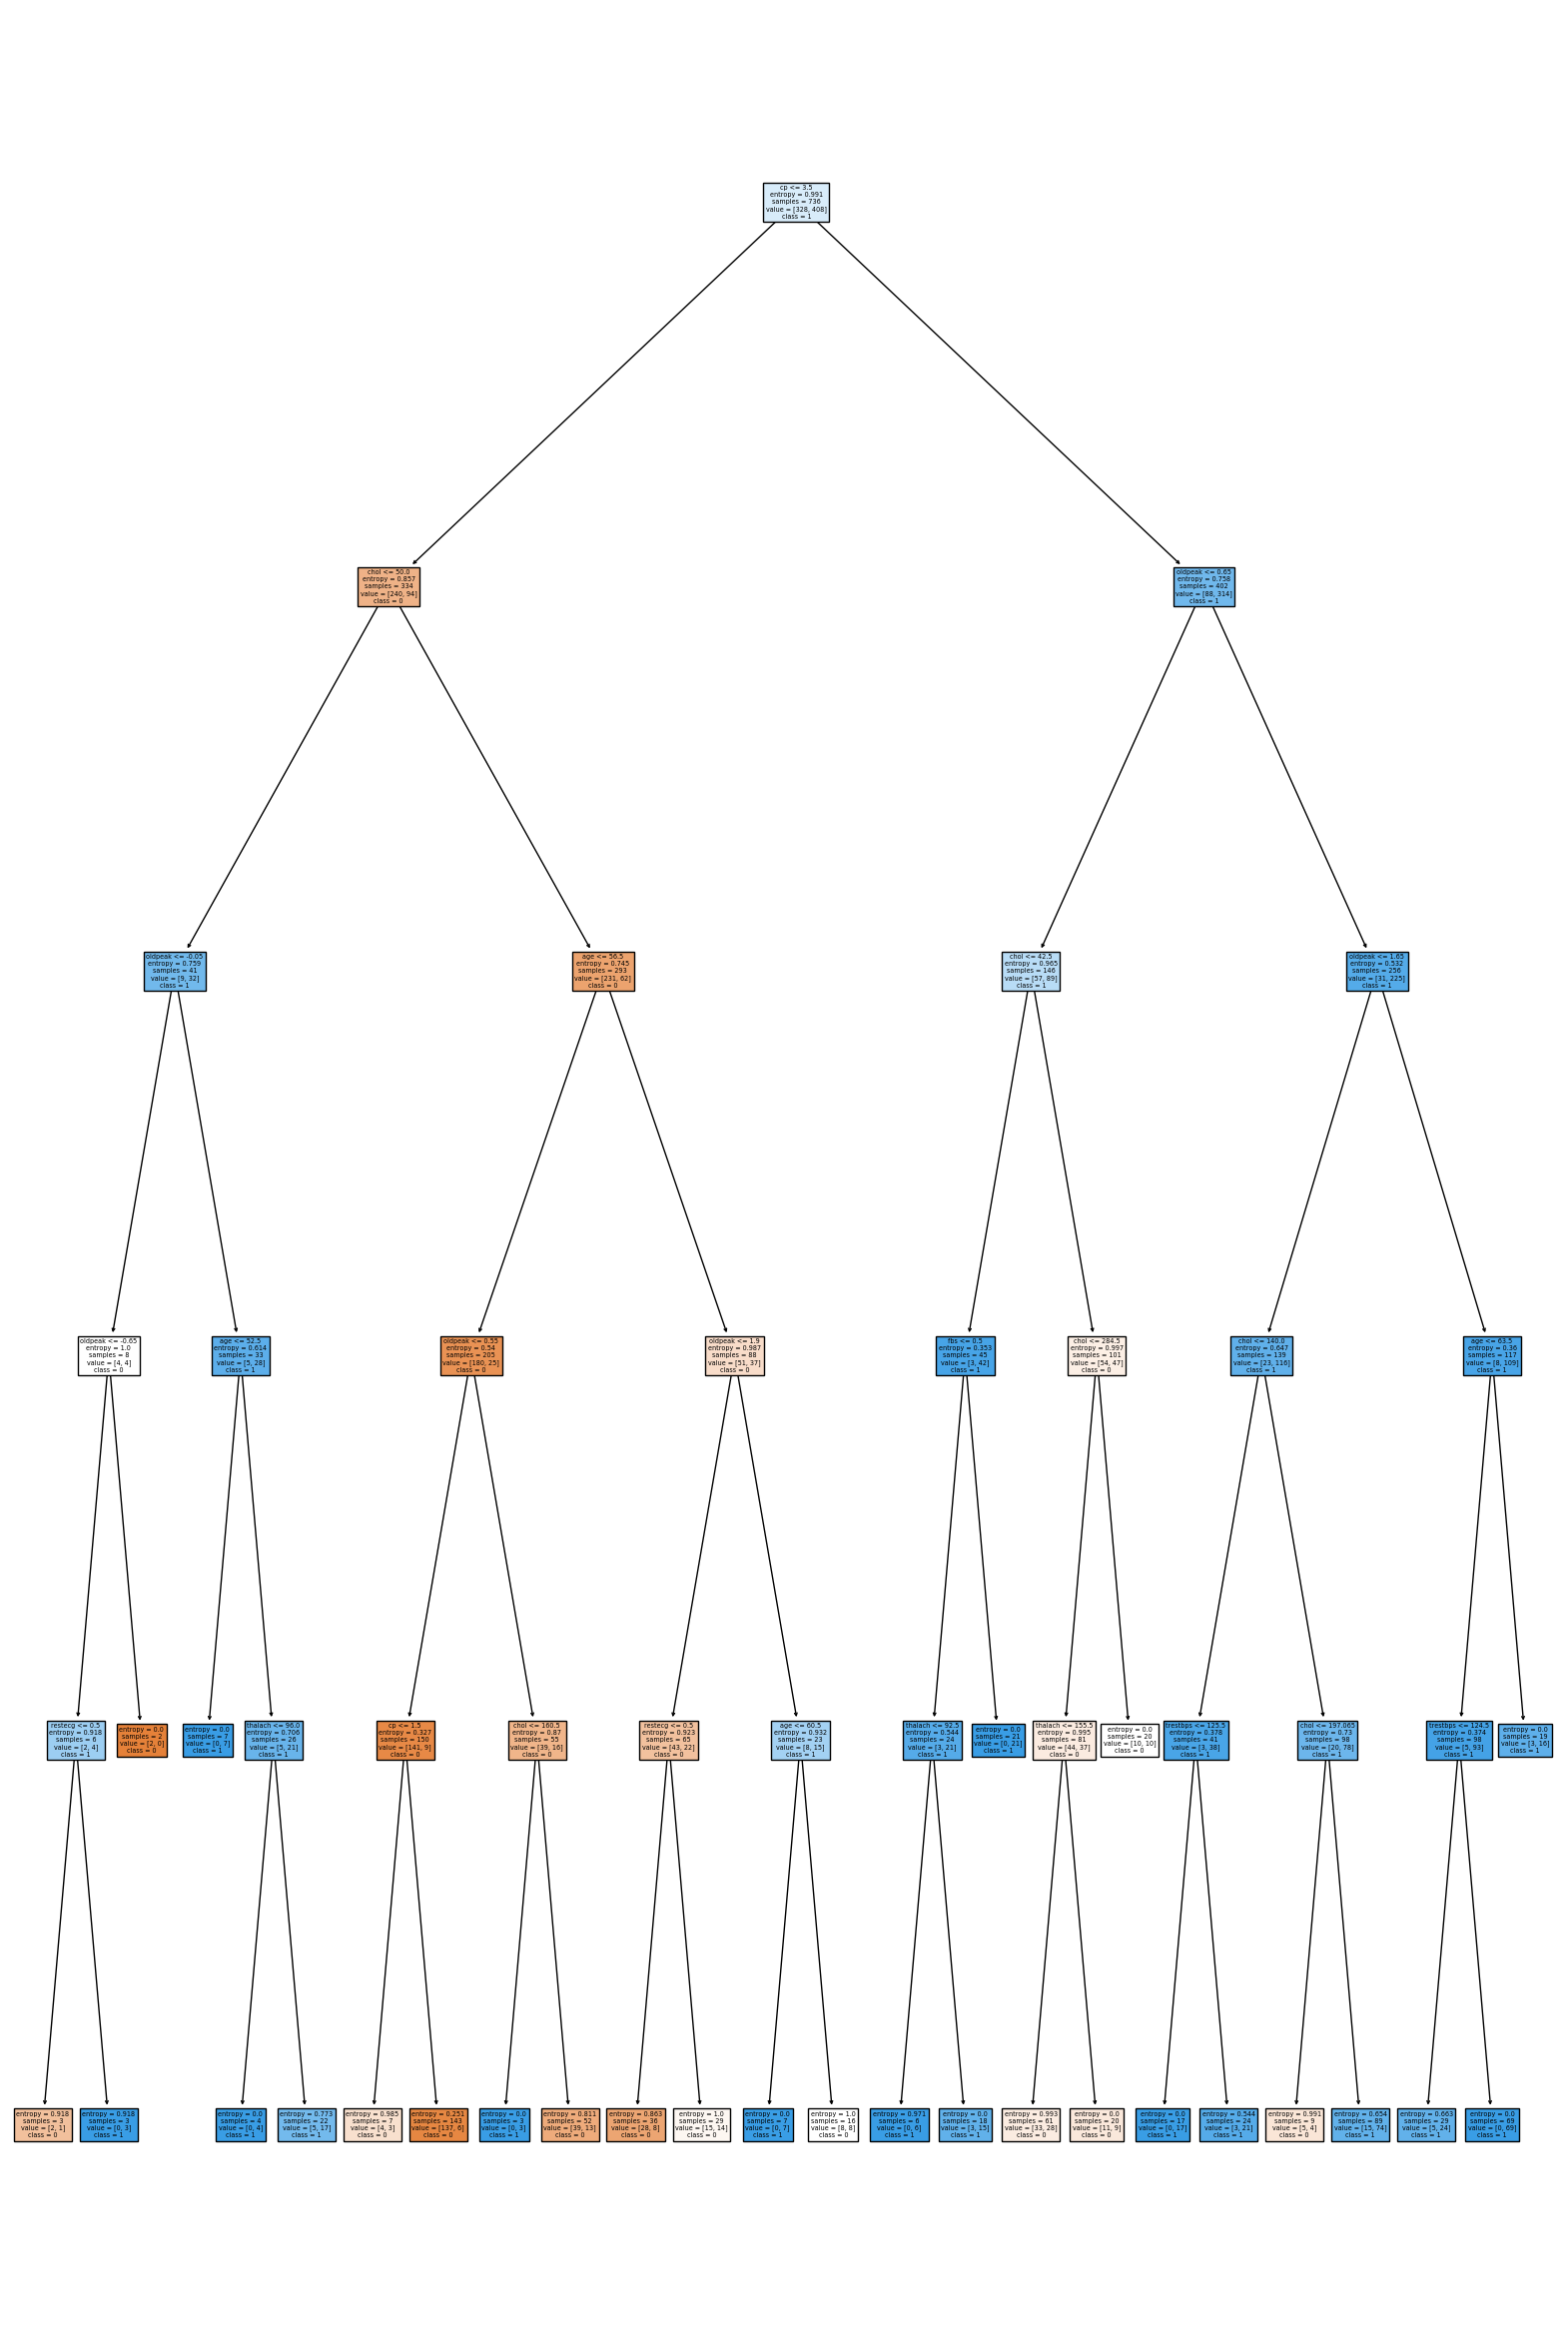

In [198]:
best_clf.fit(X_train, y_train)
plt.figure(figsize=(20,30))
tree.plot_tree(best_clf, filled=True, feature_names=X.columns.to_list(), class_names=["0", "1"])
plt.show()

Finalmente entrenamos con los mejores parametros encontrados y mostramos el arbol

[[74  9]
 [37 64]]
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        83
           1       0.88      0.63      0.74       101

    accuracy                           0.75       184
   macro avg       0.77      0.76      0.75       184
weighted avg       0.78      0.75      0.75       184


ROC AUC: 0.86
Sensitivity: 0.63
Specificity: 0.89


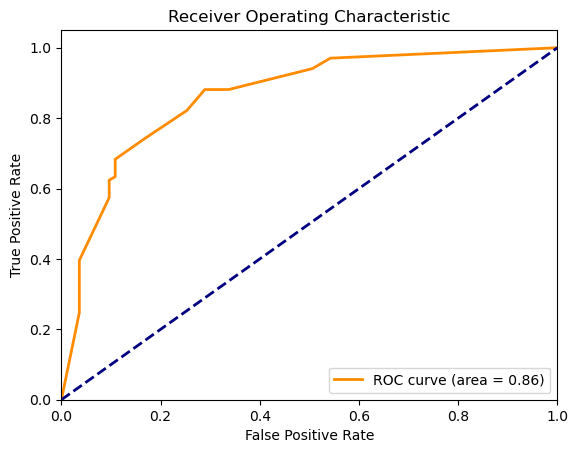

In [199]:
y_pred = best_clf.predict(X_test)
y_prob = best_clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)  # Sensibilidad
specificity = tn / (tn + fp)  # Especificidad
# Evaluamos el rendimiento del árbol
print(conf_matrix)
print(classification_report(y_test, y_pred, target_names=["0", "1"]))
print(f"\nROC AUC: {roc_auc:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Al analizar las métricas de evaluación podemos ver que nuestro modelo tiene un porcentaje de predicción realtivamente bueno, no excelente pero si con unos resultados satisfactorios, se intento mejorar estos valores usando medias en columnas en las que se podia, sin embargo esto no resulto, llevando incluso a empeorar el desempeño del modelo.

In [200]:
importancia = best_clf.feature_importances_
caracteristicas = X_train.columns

caracteristicas_imp = pd.DataFrame({'feature': caracteristicas, 'importance': importancia})
caracteristicas_imp = caracteristicas_imp.sort_values(by='importance', ascending=False)
caracteristicas_imp


,feature,importance
1,cp,0.380912
3,chol,0.248351
7,oldpeak,0.148297
0,age,0.087657
6,thalach,0.075305
2,trestbps,0.052114
4,fbs,0.007509
5,restecg,-0.000145


La lista de arriba muestra las variables mas importantes, aqui pudimos ver que 'sex' y 'exang', que es la angina inducida por el ejercicio no eran realemente representativas, por lo que decidi quitarlas del dataframe, después de volver ejecutar el entrenamiento mejoro ligeramente la predicción de resultados positivos, mientras que empeoro ligeramente la de resultados negativos. Pero en general los resultados son iguales, por otro lado podemos ver que el tipo de dolor de pecho es el mas importante segun el modelo a la hora de detectar la enfermedad, otras caracteristicas importantes son el nivel de colesterol y la depresión del segmento ST- Estas caracteristicas juntas tienen cerca del 77% de importancia. 